In [2]:
import numpy as np
np.random.seed(10)

In [ ]:
class ISTA():
    
    def __init__(self, lambd=0.1, eta=0.1, tol=1e-5, max_iter=3000):
        self.A = np.random.randn(2000,1000)
        x = np.random.randn(1000,1)
        
        # x has to be 100 sparse
        index_array = np.random.randint(0,1000,(100,)) # Choose 100 random indeces from 0 - 1000
        mask_array = np.zeros((1000,1), dtype=bool) # Convert it to bool
        mask_array[index_array] = True
        x[~mask_array] = 0 # Change the not picked ones to zero.
        self.x_star = x # assigned to another value for debugging.
        
        e = np.random.randn(2000,1) * np.sqrt(0.1)
        self.y = self.A@x + e
        self.lambd = lambd # Random
        # self.eta = eta
        # https://nikopj.github.io/blog/understanding-ista/, mentions learning rate is 1/squared greates singular value
        _, S, _ = np.linalg.svd(self.A)
        self.eta = 1/(S[0]**2)
        self.tol = tol
        self.max_iter = max_iter
        self.cost_list = []
        
    def l1_cost(self, x):
        return 1/2 * np.sum((self.A@x - self.y) **2) + self.lambd*np.sum(x)
        
    def comp_grad_f(self, x):
        grad_f = self.A.T@self.A@x - self.A.T@self.y
        return grad_f
    
    def grad_descent(self):
        x_0 = np.zeros_like(self.x_star)
        i=1
        while np.any(np.abs(x_0 - self.x_star) > self.tol):
            print(i)
            grad = self.comp_grad_f(x_0)
            inner_term = x_0 - self.eta * grad
            
            # Mask1 for case1
            mask1 = inner_term < -self.lambd*self.eta
            # Mask 3 for case3
            mask3 = inner_term > self.lambd*self.eta
            # Mask 2 for case2
            mask2 = np.logical_and(inner_term >= -self.lambd, inner_term <= self.lambd)
            
            x_0[mask1] =  inner_term[mask1] + self.lambd*self.eta
            x_0[mask3] =  inner_term[mask3] - self.lambd*self.eta
            x_0[mask2] =  0
            self.cost_list.append(self.l1_cost(x_0))
            
            i += 1
            if i>self.max_iter:
                break
        return x_0
        
        

In [ ]:
inst = ISTA(lambd=0.01, eta=0.01, tol=1e-1, max_iter=50)
x_hat = inst.grad_descent()

In [ ]:
inst.cost_list

In [ ]:
opt_cost = inst.l1_cost(inst.x_star)
opt_cost

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1)
iter = np.arange(1,len(inst.cost_list)+1)
opt_cost1 = np.ones_like(iter) * opt_cost
axs.plot(iter ,opt_cost1, label='Optimal Cost')
axs.plot(iter, inst.cost_list, label='True Total Cost')
axs.set_xlabel('Cost')
axs.set_ylabel('Iterations')
axs.legend()

Implementation Part B

In [7]:
class ISTA():
    
    def __init__(self, k=100, lambd=0.01, eta=0.1, tol=1e-1, max_iter=3000):
        self.A = np.random.randn(500,2000)
        x = np.random.randn(2000,1)
        
        # x has to be 100 sparse
        index_array = np.random.randint(0,2000,(k,)) # Choose k random indeces from 0 - 1000
        mask_array = np.zeros((2000,1), dtype=bool) # Convert it to bool
        mask_array[index_array] = True
        x[~mask_array] = 0 # Change the not picked ones to zero.
        self.x_star = x # assigned to another value for debugging.
        
        e = np.random.randn(500,1) * np.sqrt(0.1)
        self.y = self.A@x + e
        self.lambd = lambd # Random
        # self.eta = eta
        # https://nikopj.github.io/blog/understanding-ista/, mentions learning rate is 1/squared greates singular value
        _, S, _ = np.linalg.svd(self.A)
        self.eta = 1/(S[0]**2)
        self.tol = tol
        self.max_iter = max_iter
        self.cost_list = []
        
    def l1_cost(self, x):
        return 1/2 * np.sum((self.A@x - self.y) **2) + self.lambd*np.sum(x)
        
    def comp_grad_f(self, x):
        grad_f = self.A.T@self.A@x - self.A.T@self.y
        return grad_f
    
    def grad_descent(self):
        x_0 = np.zeros_like(self.x_star)
        i=1
        while np.any(np.abs(x_0 - self.x_star) > self.tol):
            grad = self.comp_grad_f(x_0)
            inner_term = x_0 - self.eta * grad
            
            # Mask1 for case1
            mask1 = inner_term < -self.lambd*self.eta
            # Mask 3 for case3
            mask3 = inner_term > self.lambd*self.eta
            # Mask 2 for case2
            mask2 = np.logical_and(inner_term >= -self.lambd, inner_term <= self.lambd)
            
            x_0[mask1] =  inner_term[mask1] + self.lambd*self.eta
            x_0[mask3] =  inner_term[mask3] - self.lambd*self.eta
            x_0[mask2] =  0
            self.cost_list.append(self.l1_cost(x_0))
            
            i += 1
            if i>self.max_iter:
                break
        return x_0

In [8]:
list_of_totalcosts = []
list_of_optimalcosts = []
x_list = []
for k in range(1, 501, 20):
    inst = ISTA(k=k, max_iter=50, lambd=0.01)
    x_hat = inst.grad_descent()
    list_of_totalcosts.append(inst.cost_list[-1])
    list_of_optimalcosts.append(inst.l1_cost(inst.x_star))
    x_list.append((x_hat, inst.x_star))

In [10]:
list_of_totalcosts

[16.60017927352707,
 0.13662495577908634,
 0.1259281106042307,
 0.11809317428048846,
 0.068408856483757,
 0.06723731982752039,
 0.06636550641590118,
 0.0604480516534292,
 0.14298196875007058,
 -0.015412691214834365,
 -0.015799871659540075,
 0.07592811063295785,
 0.04754079044655997,
 0.029659857126101842,
 -0.016905597322215263,
 -0.20348758471307354,
 0.0991487687295658,
 0.09739922474117133,
 0.030351841407853186,
 -0.022119806468097983,
 0.18119092764351055,
 0.10203229195305227,
 0.22106429006744857,
 0.11768891723936697,
 0.07710159156536794]

In [12]:
list_of_optimalcosts

[22.759143576487038,
 26.75359034781411,
 23.99888897901533,
 25.783203349245042,
 27.046234728955756,
 26.888330330345777,
 26.679408449689355,
 23.715174599749584,
 24.433105569559956,
 26.292283004167636,
 26.328442564235964,
 23.707579026037475,
 21.957587327966436,
 23.434920286742965,
 25.219744437086323,
 27.986799377884577,
 24.432137931275555,
 22.5070578615791,
 26.618551773882608,
 25.431267184215603,
 26.31692912410514,
 24.922729470307786,
 25.694162677113468,
 23.988841549144194,
 24.221161604348303]

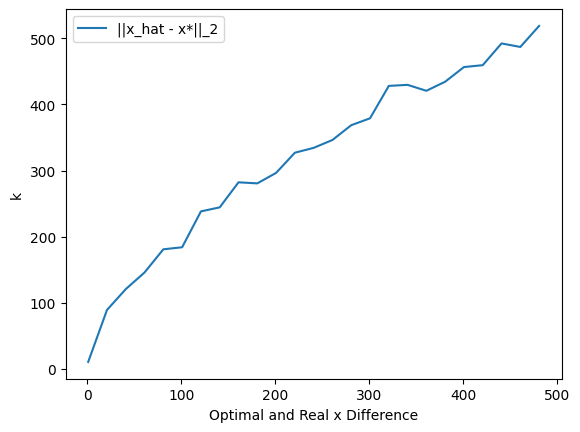

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1)
iter = np.arange(1,501,20)

cost_diff = [np.sum(np.abs(x[0]-x[1])) for x in x_list]
axs.plot(iter,cost_diff, label='||x_hat - x*||_2')
axs.set_xlabel('Optimal and Real x Difference')
axs.set_ylabel('k')
axs.legend()